In [0]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np

In [0]:
def data_preprocessing(prefix_path):
  X_test = np.array(np.load(prefix_path+"test_after_.npy"))
  y_test = np.load(prefix_path+"y_test.npy")
  person_train_valid = np.load(prefix_path+"person_train_valid.npy")
  X_train_valid = np.array(np.load(prefix_path+"train_after_.npy"))
  y_train_valid = np.load(prefix_path+"y_train_valid.npy")
  person_test = np.load(prefix_path+"person_test.npy")
  X_train_valid = X_train_valid[:,:22,:]
  X_train_valid = np.transpose(X_train_valid,(0,2,1))
  X_test = X_test[:,:22,:]
  X_test = np.transpose(X_test,(0,2,1))
  y_train = np.zeros((2115, 4))
  y_train[y_train_valid==769, 0] = 1
  y_train[y_train_valid==770, 1] = 1
  y_train[y_train_valid==771, 2] = 1
  y_train[y_train_valid==772, 3] = 1
  y_test4 = np.zeros((443, 4))
  y_test4[y_test==769, 0] = 1
  y_test4[y_test==770, 1] = 1
  y_test4[y_test==771, 2] = 1
  y_test4[y_test==772, 3] = 1
  return X_train_valid, y_train, X_test, y_test4

In [0]:
prefix_path = "/content/drive/My Drive/239/project/"
X_train_valid, y_train_valid, X_test, y_test = data_preprocessing(prefix_path)

In [6]:
X_train_valid.shape

(2115, 248, 22)

In [6]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense,LSTM,Conv2D,MaxPooling2D,Activation,Reshape,Dropout,Flatten,Lambda
from keras import regularizers
from keras.layers.normalization import BatchNormalization
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Using TensorFlow backend.


In [0]:
def r_cnn_model():
  model = Sequential()
  activation = 'relu'
  num_classes = 4
  hidden_units=100
  input_num = 248
  seq_keep =200
  init = 'glorot_uniform'
  #Block 1
  model.add(LSTM(hidden_units,return_sequences=True,dropout=0.2,input_shape=(input_num,22)))
  model.add(Lambda(lambda x: x[:,-seq_keep:,:],output_shape=(seq_keep,hidden_units)))
  model.add(Reshape((seq_keep,hidden_units,1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.1))
  #Block 2
#   model.add(Conv2D(filters=8, kernel_size=(3, 3),kernel_initializer=init))
  model.add(Conv2D(filters=8, kernel_size=(3, 3),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(3, 3),strides=3))
  model.add(Dropout(0.5))
  #Block 3
  model.add(Conv2D(filters=16, kernel_size=(3, 3),kernel_initializer=init))
  model.add(BatchNormalization())
  model.add(Activation(activation))
  model.add(MaxPooling2D(pool_size=(3, 3),strides=3))
  model.add(Dropout(0.5))
#   #Block 4
#   model.add(Conv2D(filters=32, kernel_size=(3, 3),kernel_initializer=init))
#   model.add(BatchNormalization())
#   model.add(Activation(activation))
#   model.add(MaxPooling2D(pool_size=(3, 3),strides=3))
#   model.add(Dropout(0.5))
#   #Block 5
#   model.add(Conv2D(filters=64, kernel_size=(3,3),kernel_initializer=init))
#   model.add(BatchNormalization())
#   model.add(Activation(activation))
#   model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
#   model.add(Dropout(0.5))
  #Block 6
  model.add(Flatten())
  model.add(Dense(300, activation='relu'))
  model.add(Dense(num_classes, kernel_initializer=init, kernel_regularizer=regularizers.l2(0.01),
                activity_regularizer=regularizers.l1(0.01), activation='softmax'))
  return model
  

In [58]:
i = 1
model = r_cnn_model()
for layers in model.layers:
    print('Layer %d:' % i, layers.name)
#     print(layers.__dict__)
    if(hasattr(layers,'kernel_initializer')):
        print(layers.kernel_initializer)
    print(layers.input_shape)
    print(layers.output_shape)
    print()
    i += 1

Layer 1: lstm_25
(None, 248, 22)
(None, 248, 100)

Layer 2: lambda_25
(None, 248, 100)
(None, 200, 100)

Layer 3: reshape_25
(None, 200, 100)
(None, 200, 100, 1)

Layer 4: batch_normalization_76
(None, 200, 100, 1)
(None, 200, 100, 1)

Layer 5: dropout_88
(None, 200, 100, 1)
(None, 200, 100, 1)

Layer 6: conv2d_66
(None, 200, 100, 1)
(None, 198, 98, 8)

Layer 7: batch_normalization_77
(None, 198, 98, 8)
(None, 198, 98, 8)

Layer 8: activation_65
(None, 198, 98, 8)
(None, 198, 98, 8)

Layer 9: max_pooling2d_65
(None, 198, 98, 8)
(None, 66, 32, 8)

Layer 10: dropout_89
(None, 66, 32, 8)
(None, 66, 32, 8)

Layer 11: conv2d_67
(None, 66, 32, 8)
(None, 64, 30, 16)

Layer 12: batch_normalization_78
(None, 64, 30, 16)
(None, 64, 30, 16)

Layer 13: activation_66
(None, 64, 30, 16)
(None, 64, 30, 16)

Layer 14: max_pooling2d_66
(None, 64, 30, 16)
(None, 21, 10, 16)

Layer 15: dropout_90
(None, 21, 10, 16)
(None, 21, 10, 16)

Layer 16: flatten_23
(None, 21, 10, 16)
(None, 3360)

Layer 17: dense_

In [31]:
model = r_cnn_model()
model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.adam(lr = 0.001,decay=1e-5), metrics = ['accuracy'])  
result = model.fit(X_train_valid, y_train_valid, batch_size = 32, validation_split = 0.2, epochs = 150)

Train on 1692 samples, validate on 423 samples
Epoch 1/150
1692/1692 [==============================] - 34s 20ms/step - loss: 9.4294 - acc: 0.2559 - val_loss: 8.8939 - val_acc: 0.2459
Epoch 2/150
1692/1692 [==============================] - 30s 18ms/step - loss: 9.4094 - acc: 0.2725 - val_loss: 8.9141 - val_acc: 0.2482
Epoch 3/150
1692/1692 [==============================] - 30s 18ms/step - loss: 9.1633 - acc: 0.2535 - val_loss: 9.1516 - val_acc: 0.2364
Epoch 4/150
1692/1692 [==============================] - 30s 18ms/step - loss: 9.0902 - acc: 0.2772 - val_loss: 8.8559 - val_acc: 0.2506
Epoch 5/150
1692/1692 [==============================] - 30s 18ms/step - loss: 9.1091 - acc: 0.2736 - val_loss: 9.0744 - val_acc: 0.2364
Epoch 6/150
1692/1692 [==============================] - 30s 17ms/step - loss: 8.9183 - acc: 0.2707 - val_loss: 8.4018 - val_acc: 0.2553
Epoch 7/150
1692/1692 [==============================] - 30s 18ms/step - loss: 8.8447 - acc: 0.2748 - val_loss: 8.4206 - val_acc: 0

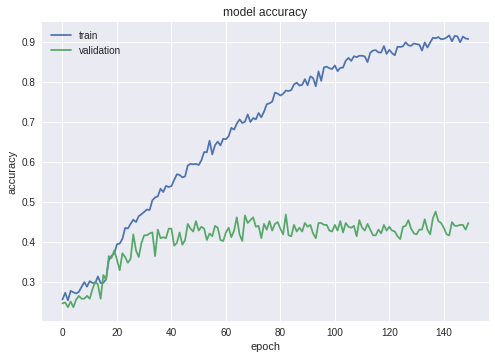

In [33]:
import matplotlib.pyplot as plt
plt.plot(result.history['acc'])
plt.plot(result.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [42]:
test_results = model.predict(x = X_test, batch_size = 16)
categ_results = np.argmax(test_results, axis = 1)
categ_test = np.argmax(y_test)
test_acc = np.sum(categ_results==categ_test)/len(categ_results)
print('Training Accuracy: %.3f' % result.history['acc'][-1])
print('Validation Accuracy: %.3f' % max(result.history['val_acc']))
print('Testing Accuracy: %.3f' % test_acc)

Training Accuracy: 0.907
Validation Accuracy: 0.475
Testing Accuracy: 0.345
